### Hipótese 3 (Regressão Linear)
`Matheus Raz (mrol@cin.ufpe.br)`

`João Paulo Lins (jplo@cin.ufpe.br)`

#### É possível prever o número de vendas em outras regiões do mundo baseado nas vendas da América do Norte e Europa?

In [119]:
from IPython.display import display

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from matplotlib import pyplot as plt

In [120]:
df = pd.read_csv('vgsalesPP2.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Name,Platform_left,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,"mixi, Inc",responDESIGN,AO,E,E10+,EC,K-A,M,RP,T
0,Wii Sports,Wii,2006,Sports,Nintendo,1.000000,1.000000,0.368885,0.799432,1.000000,...,0,0,0,1,0,0,0,0,0,0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,0.703095,0.123619,0.666341,0.072848,0.487580,...,0,0,0,1,0,0,0,0,0,0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,0.379110,0.440608,0.370841,0.311258,0.430389,...,0,0,0,1,0,0,0,0,0,0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,0.377418,0.377417,0.320939,0.279092,0.397068,...,0,0,0,1,0,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,0.272485,0.306975,1.000000,0.094607,0.380104,...,0,0,0,1,0,0,0,0,0,0
5,Tetris,GB,1989,Puzzle,Nintendo,0.560928,0.078039,0.412916,0.054872,0.366655,...,0,0,0,1,0,0,0,0,0,0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,0.272727,0.315608,0.636008,0.272469,0.361081,...,0,0,0,1,0,0,0,0,0,0
7,Wii Play,Wii,2006,Misc,Nintendo,0.337524,0.316989,0.286693,0.268685,0.350418,...,0,0,0,1,0,0,0,0,0,0
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,0.349130,0.239641,0.459883,0.211921,0.343148,...,0,0,0,1,0,0,0,0,0,0
9,Duck Hunt,NES,1984,Shooter,Nintendo,0.651112,0.021754,0.027397,0.044465,0.343027,...,0,0,0,1,0,0,0,0,0,0


In [121]:
X = df[['NA_Sales','EU_Sales']].copy()
y = df['Other_Sales'].copy()
display(X)
y

,NA_Sales,EU_Sales
0,1.000000,1.000000
1,0.703095,0.123619
2,0.379110,0.440608
3,0.377418,0.377417
4,0.272485,0.306975
5,0.560928,0.078039
6,0.272727,0.315608
7,0.337524,0.316989
8,0.349130,0.239641
9,0.651112,0.021754


0        0.799432
1        0.072848
2        0.311258
3        0.279092
4        0.094607
5        0.054872
6        0.272469
7        0.268685
8        0.211921
9        0.044465
10       0.259224
11       0.179754
12       0.067171
13       0.203406
14       0.159886
15       0.167455
16       0.374645
17       1.000000
18       0.052034
19       0.192999
20       0.128666
21       0.039735
22       0.043519
23       0.133396
24       0.168401
25       0.047304
26       0.111637
27       0.075686
28       0.109745
29       0.124882
           ...   
16382    0.000000
16383    0.000000
16384    0.000000
16385    0.000000
16386    0.000000
16387    0.000000
16388    0.000000
16389    0.000000
16390    0.000000
16391    0.000000
16392    0.000000
16393    0.000000
16394    0.000000
16395    0.000000
16396    0.000000
16397    0.000000
16398    0.000000
16399    0.000000
16400    0.000000
16401    0.000000
16402    0.000000
16403    0.000000
16404    0.000000
16405    0.000000
16406    0

In [122]:
def avarage_scores(scores):
    sum_scores = 0
    for i in scores:
        sum_scores += i
    return sum_scores/len(scores)

scores = []
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
for i in range(30):
    lm = LinearRegression()
    model = lm.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

print("Porcentagem de acerto da regressão linear: {}%".format(avarage_scores(scores)*100))

Porcentagem de acerto da regressão linear: 62.17002025881314%


### Conclusão

A correlação entre as vendas das regiões da América do Norte e Europa com as vendas de outros lugares do mundo é forte, o que implica serem valores relevantes entre eles. Através da execução da Regressão Linear, observamos que a chance de acerto foi de 62% aproximadamente, confirmando a hipótese de que é possível prever o número de vendas de um jogo em outras regioes, a partir das vendas desse jogo na América do Norte e na Europa.

Score: 0.6217002025881315


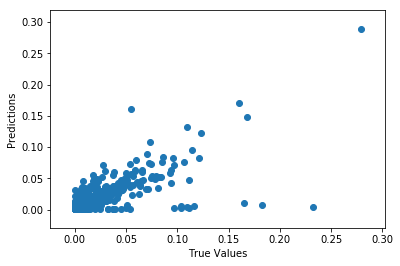

In [123]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
print("Score:", model.score(X_test, y_test))

In [129]:
scores = cross_val_score(model, X, y, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [  0.45088353   0.04301457   0.05237478  -0.34446291  -1.5087581
 -17.91039056]


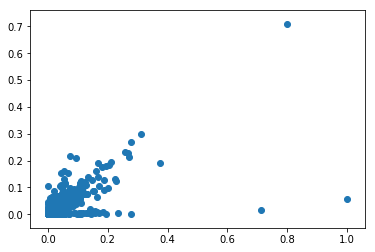

In [130]:
predictions = cross_val_predict(model, X, y, cv=6)
plt.scatter(y, predictions)

In [126]:
accuracy = metrics.r2_score(y, predictions)
print ("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.5346481790963724
